# 3D Point Cloud class
### The 3D Point Cloud class extracts and utilizes the [Point](Point%20Class.ipynb) Class

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
from geobipy import PointCloud3D
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
# Initialize a 3D point cloud with N elements
N=10
# Instantiation pointcloud with an integer size N
PC3D=PointCloud3D(N)

## Create a quick test example using random points
$z=x(1-x)cos(4\pi x)sin(4\pi y^{2})^{2}$

In [3]:
PC3D.maketest(8000)

### Write a summary of the contents of the point cloud

In [4]:
PC3D.summary()

3D Point Cloud: 
Number of Points: :8000
Name:  Easting
    Units: m
    Shape: (8000,)
    [-0.11855785 -0.16896247 -0.2821144  ..., -0.76980507 -0.7765829
 -0.55041908]
No attached prior 
No attached proposal 
Name:  Northing
    Units: m
    Shape: (8000,)
    [-0.66174785 -0.14351724  0.29223953 ...,  0.34469014  0.98169962
  0.56596476]
No attached prior 
No attached proposal 
Name:  Height
    Units: m
    Shape: (8000,)
    [ 0.107914    0.07422265 -0.18169159 ...,  0.90221523  0.06053754
  0.13172757]
No attached prior 
No attached proposal 



### Get a single location from the point as a 3x1 vector

In [5]:
Point=PC3D.getPoint(50)
# Print the point to the screen
print(Point)

x:-0.116962295087,y:0.96597489221,z:-0.013007777615


### Plot the locations with Height as colour

<IPython.core.display.Javascript object>


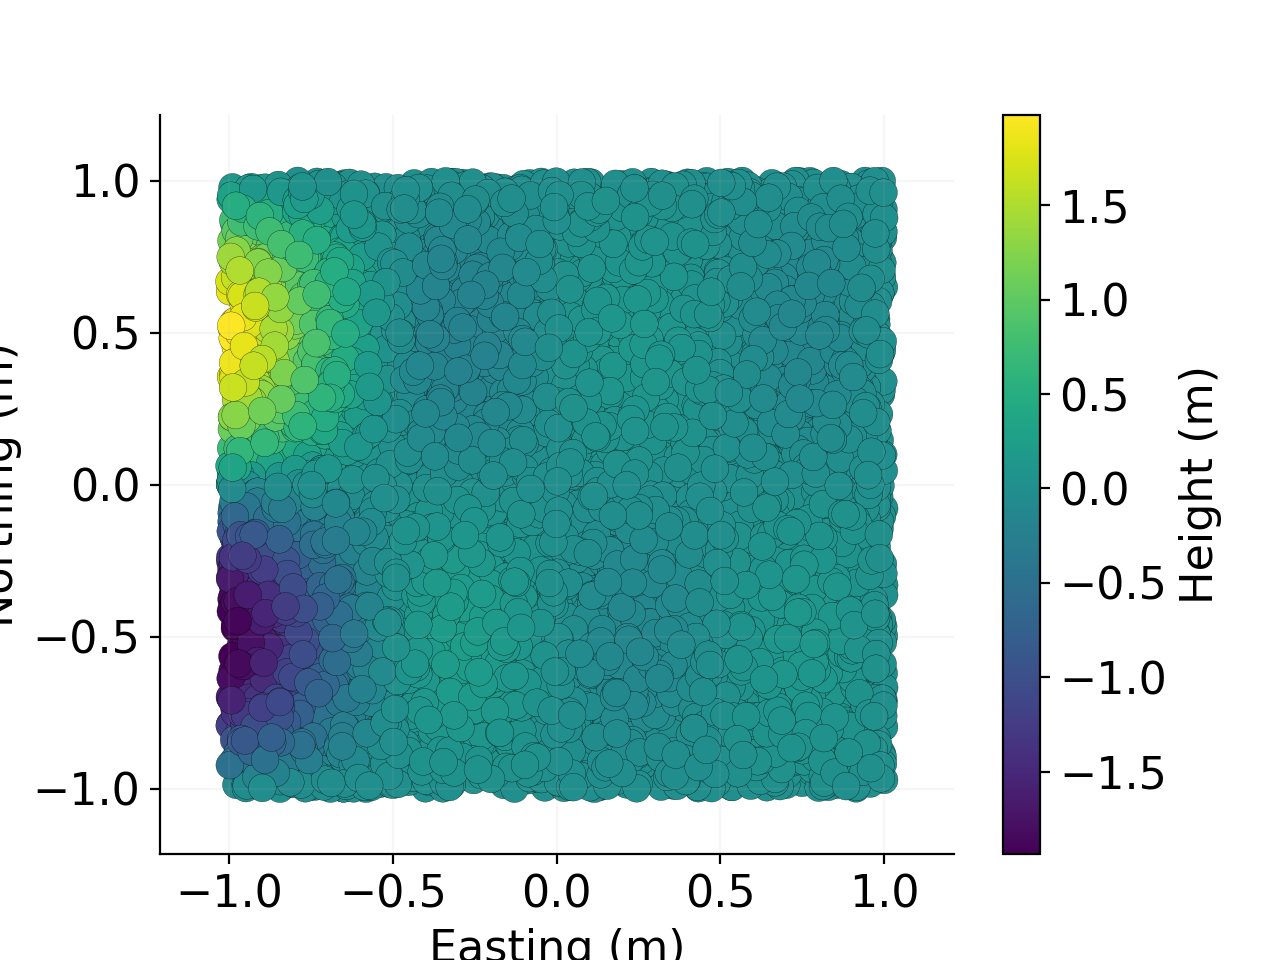

In [6]:
plt.figure()
PC3D.scatter2D(edgecolor='k')

### Plotting routines take matplotlib arguments for customization
#### For example, plotting the size of the points according to the absolute value of height

<IPython.core.display.Javascript object>


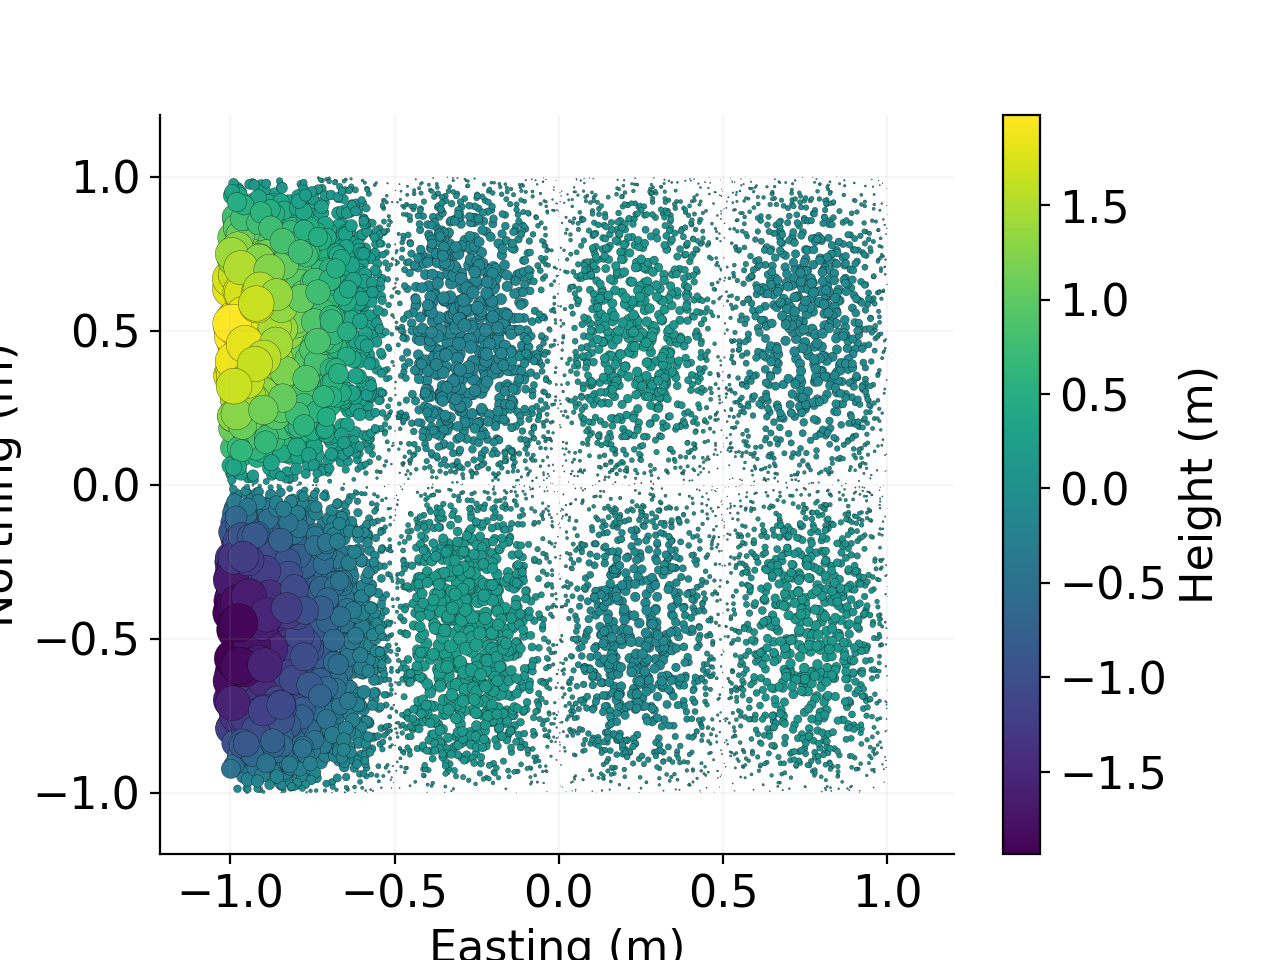

In [7]:
plt.figure()
PC3D.scatter2D(s=100*np.abs(PC3D.z),edgecolor='k')

### Grid the points using a triangulated CloughTocher interpolation

In [8]:
!surface

/bin/sh: surface: command not found


<IPython.core.display.Javascript object>


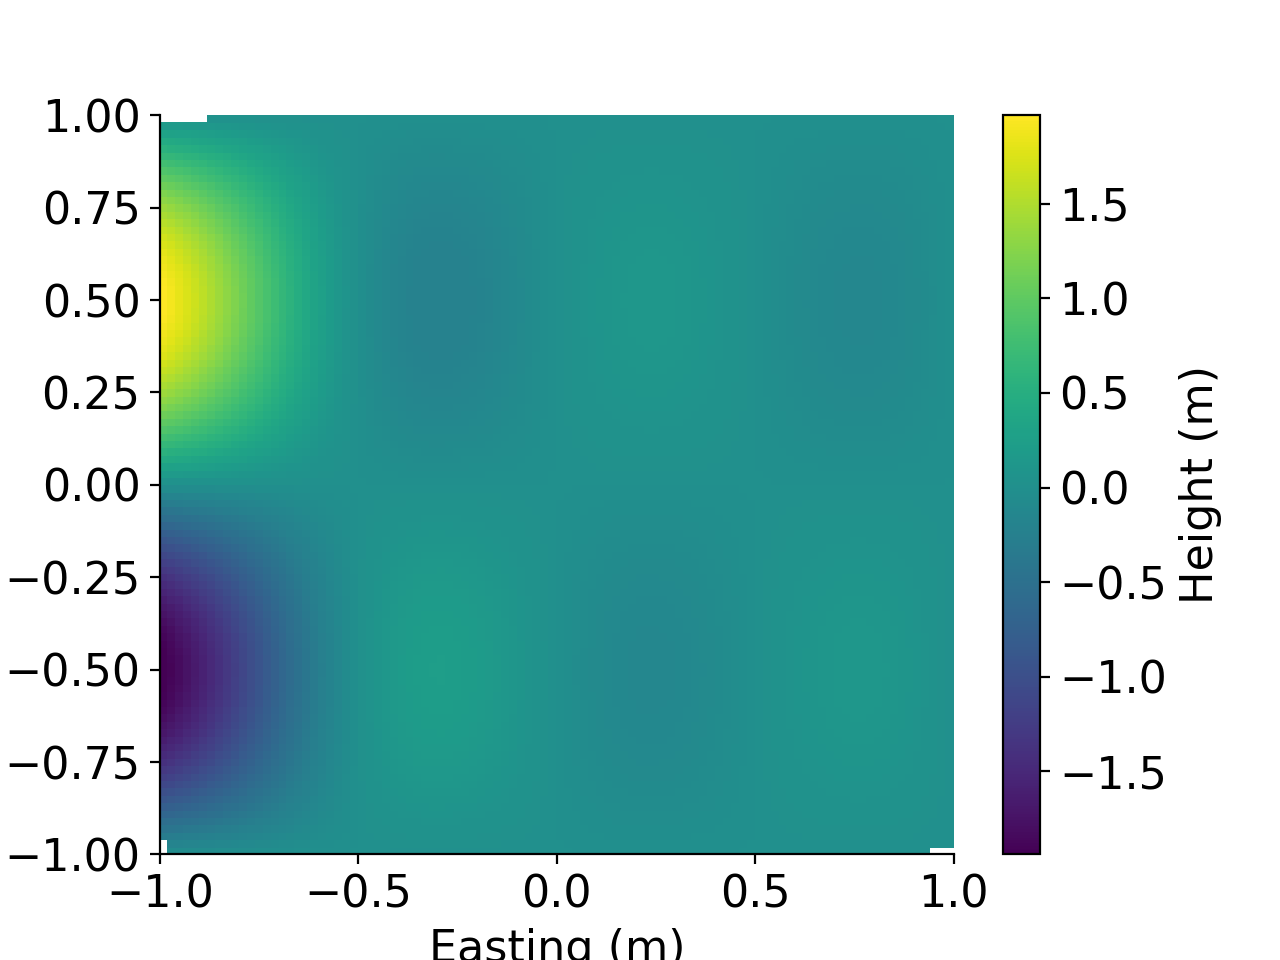

In [9]:
plt.figure()
PC3D.mapPlot(method='mc')

In [10]:
bounds=[0, 100, 0, 100]
dx = 5; dy = 5
centres = np.asarray([bounds[0]+0.5*dx, bounds[1]-0.5*dx, bounds[2]+0.5*dy, bounds[3]-0.5*dy])
nx = np.int((centres[1]-centres[0])/dx)
ny = np.int((centres[3]-centres[2])/dy)
x = np.linspace(centres[0], centres[1], nx+1)
y = np.linspace(centres[2], centres[3], ny+1)

In [11]:
xe = np.linspace(bounds[0], bounds[1], x.size+1)
print(x.size)
print(xe)

20
[   0.    5.   10. ...,   90.   95.  100.]


### We can perform spatial searches on the 3D point cloud

In [12]:
PC3D.setKdTree(nDims=2)
p=PC3D.nearest((0.0,0.0), k=10, p=2, radius=0.3)
print(p)

(array([ 0.00520058,  0.01171734,  0.01934231, ...,  0.0307776 ,
        0.03352358,  0.03475203]), array([1404, 7928, 4089, ...,  949, 3468,   30]))


#### .nearest returns the distances and indices into the point cloud of the nearest points.
We can then obtain those points as another point cloud

<IPython.core.display.Javascript object>


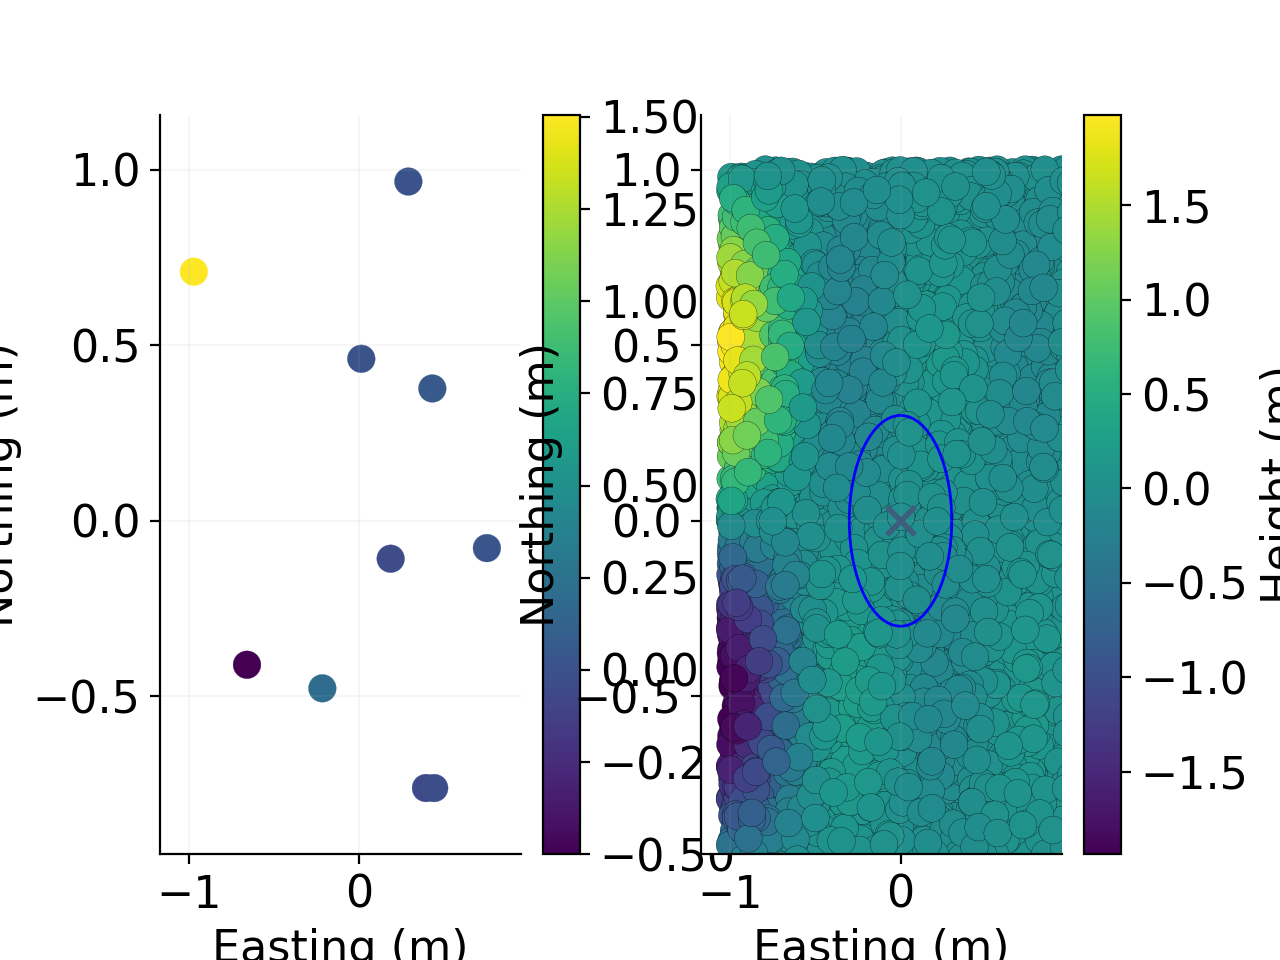

In [13]:
pNear = PC3D[p[1]-1]
plt.figure()
plt.subplot(1,2,1)
ax=pNear.scatter2D()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
plt.subplot(1,2,2)
ax=PC3D.scatter2D(edgecolor='k')
plt.xlim(xlim)
plt.ylim(ylim)
searchRadius = plt.Circle((0.0, 0.0), 0.3, color='b', fill=False)
ax.add_artist(searchRadius)
plt.plot(0.0, 0.0, 'x')

### Read in the xyz co-ordinates in columns 2,3,4 from a file. Skip 1 header line.

In [14]:
PC3D.read(join('supplementary','data','Resolve1.txt'),1,[2,3,4])

<IPython.core.display.Javascript object>


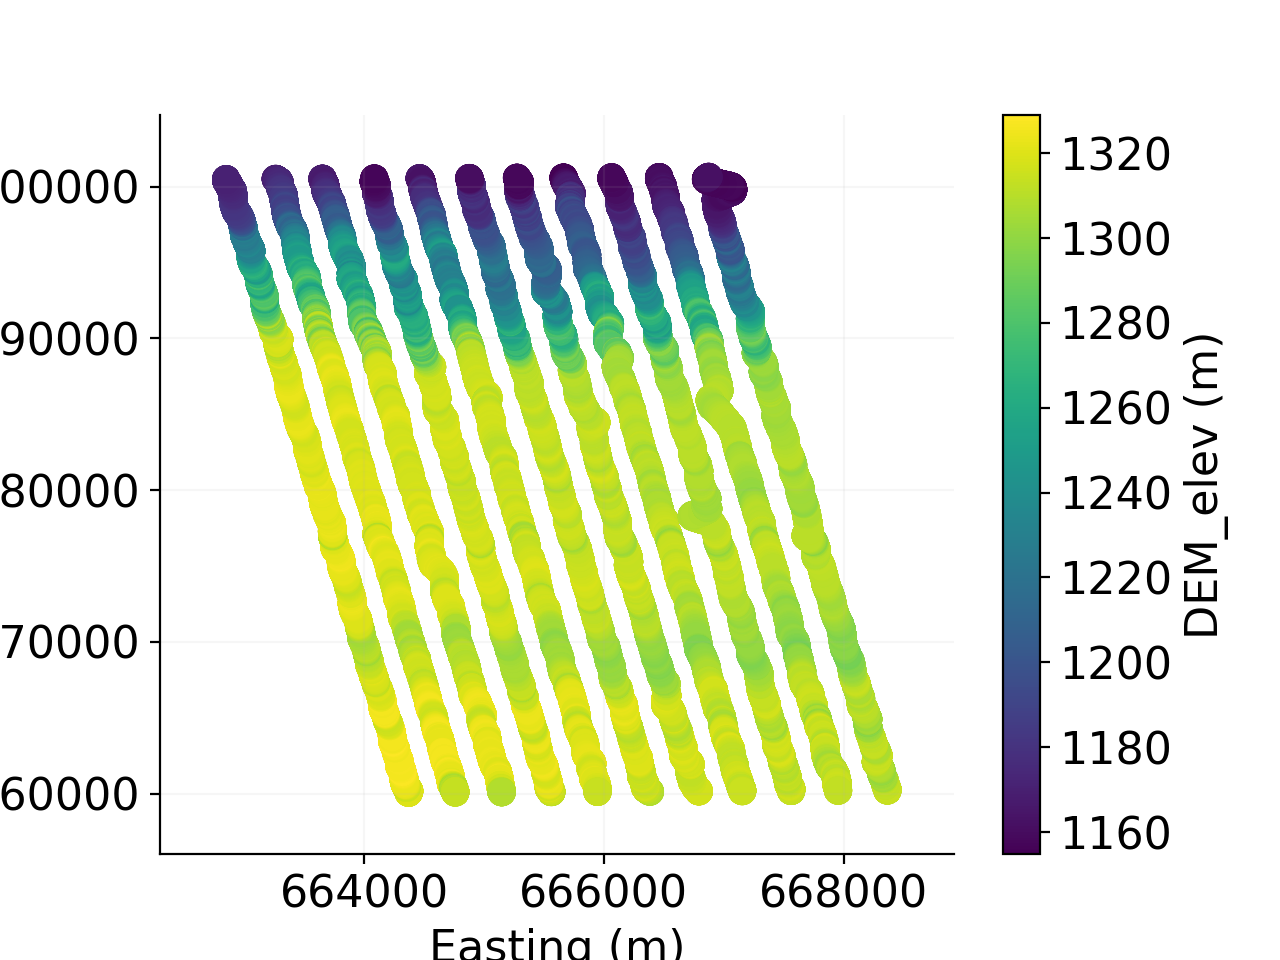

In [15]:
plt.figure()
f=PC3D.scatter2D(s=100)